# Hybrid Plant with Battery Storage Example
---
In this example, we will explore how to simulate a hybrid renewable energy system that includes both wind and solar power sources, along with battery energy storage. The battery uses the default dispatch model,simple dispatch, which uses a profit maximization objective function.

The key aspects we will cover include setting up the simulation environment, configuring the system, running the simulation, and visualizing the results.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
from hopp.simulation import HoppInterface
from hopp.tools.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)

/Users/cirmas/workspace/HOPP/ev/log/hybrid_systems_2023-12-08T16.56.15.883852.log


### Create the Simulation Model
Instantiate the `HoppInterface` class by providing a YAML configuration.

In order to configure the battery dispatch model, ensure that you include a `grid_resource_file` within the `site` section, and incorporate the `battery` size and capacity into the `technologies` section of the YAML configuration.

In [2]:
hi = HoppInterface("./ev-wind-solar-battery.yaml")

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [3]:
hi.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [4]:
hybrid_plant = hi.system

print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.8344467219331787
Annual Energies:
{"pv": 521507.8043223955, "wind": 818726.1316723045, "battery": -5515.665783596979, "hybrid": 1334718.2702110745}
Net Present Values:
{"pv": -25202.525507751183, "wind": 3056.2752455739537, "battery": -128101.90685581145, "hybrid": -155739.27681955614}
Total Revenues:
{"pv": [0.0, 20210.31457420965, 20412.417719951743, 20616.541897151263, 20822.707316122778, 21030.934389284, 21241.243733176845, 21453.65617050861, 21668.192732213694, 21884.874659535835, 22103.72340613119, 22324.760640192504, 22548.00824659443, 22773.488329060372, 23001.22321235098, 23231.23544447449, 23463.547798919233, 23698.18327690843, 23935.16510967751, 24174.516760774288, 24416.261928382028], "wind": [0.0, 32199.045853961026, 32521.036312500637, 32846.24667562564, 33174.7091423819, 33506.456233805715, 33841.52079614378, 34179.93600410521, 34521.73536414626, 34866.95271778773, 35215.622244965605, 35567.778467415264, 35923.45625208942, 36282.6

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

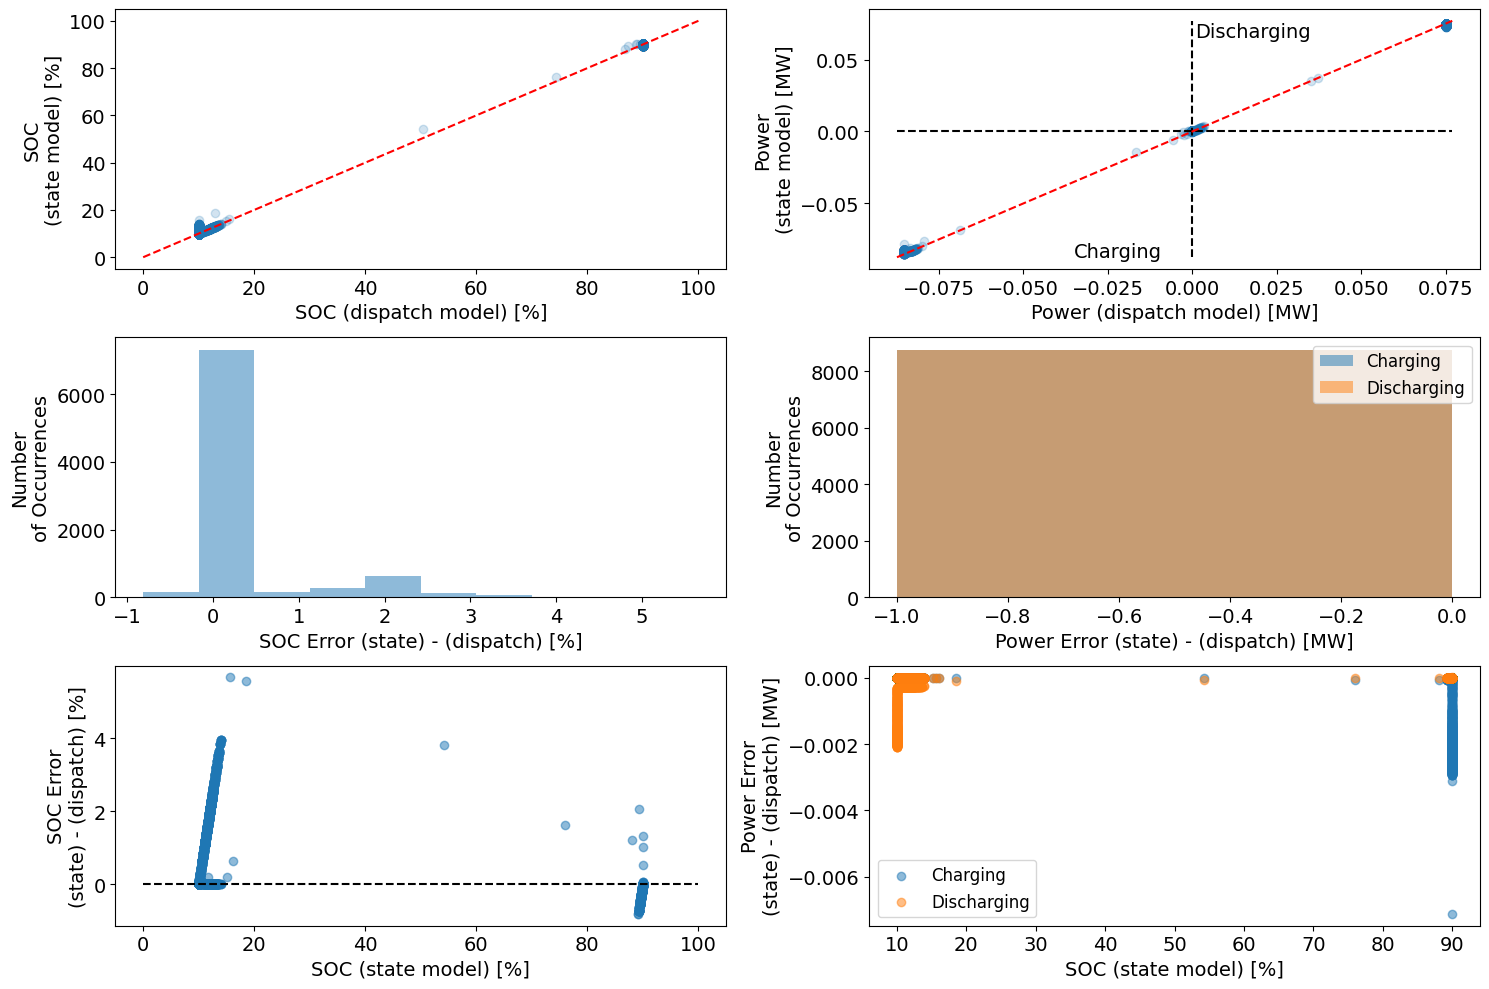

In [5]:
plot_battery_dispatch_error(hybrid_plant)

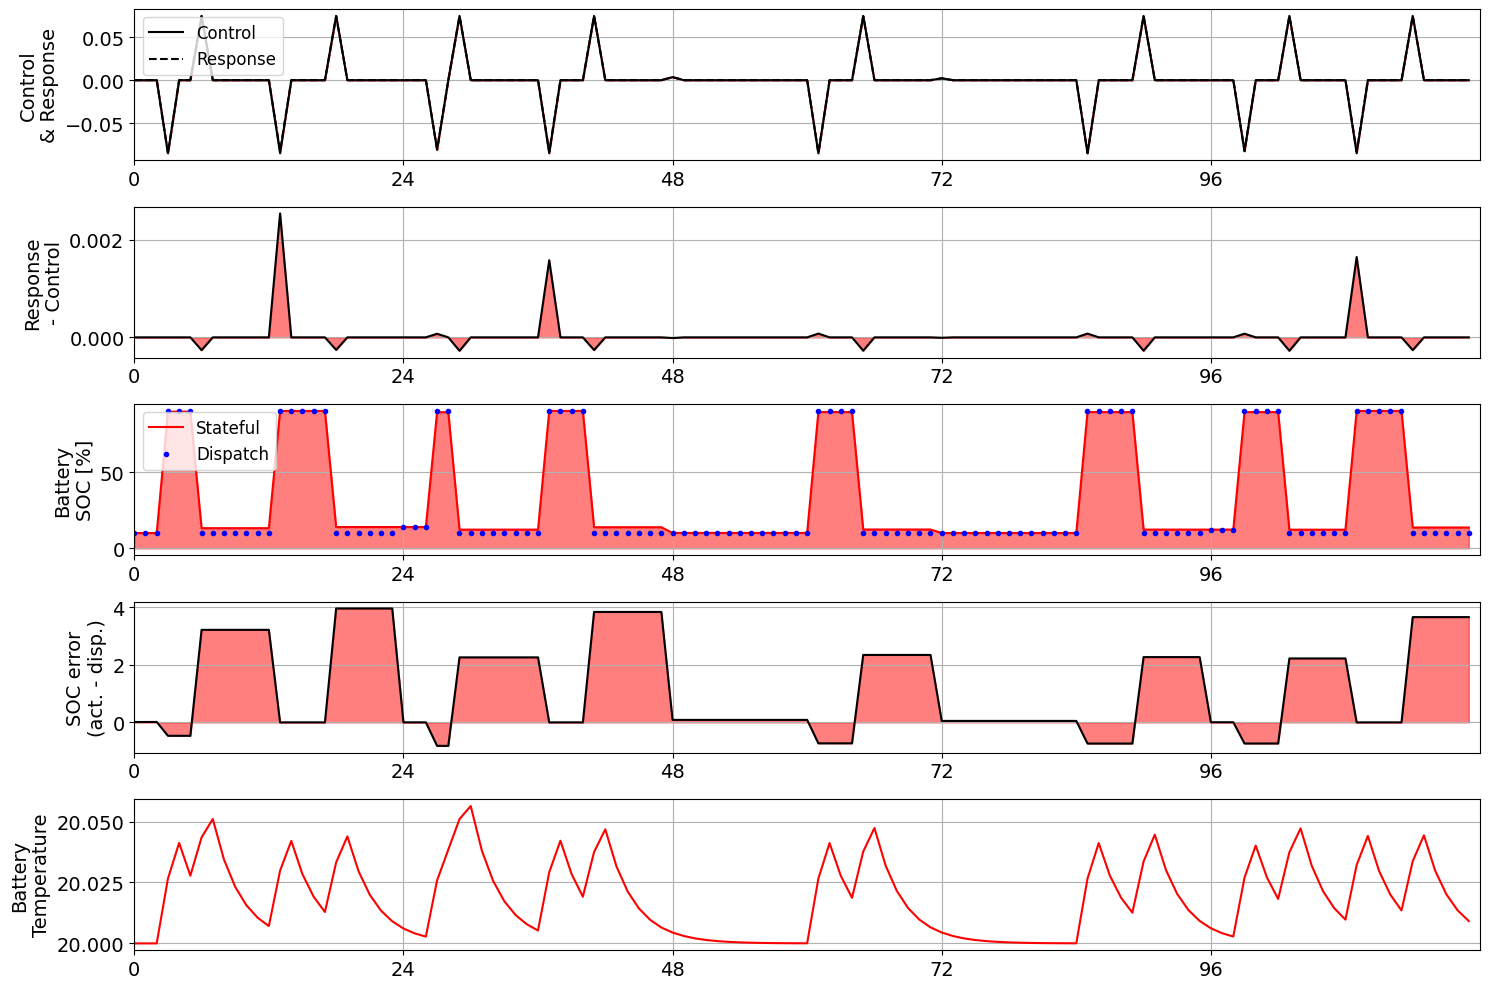

In [6]:
plot_battery_output(hybrid_plant)

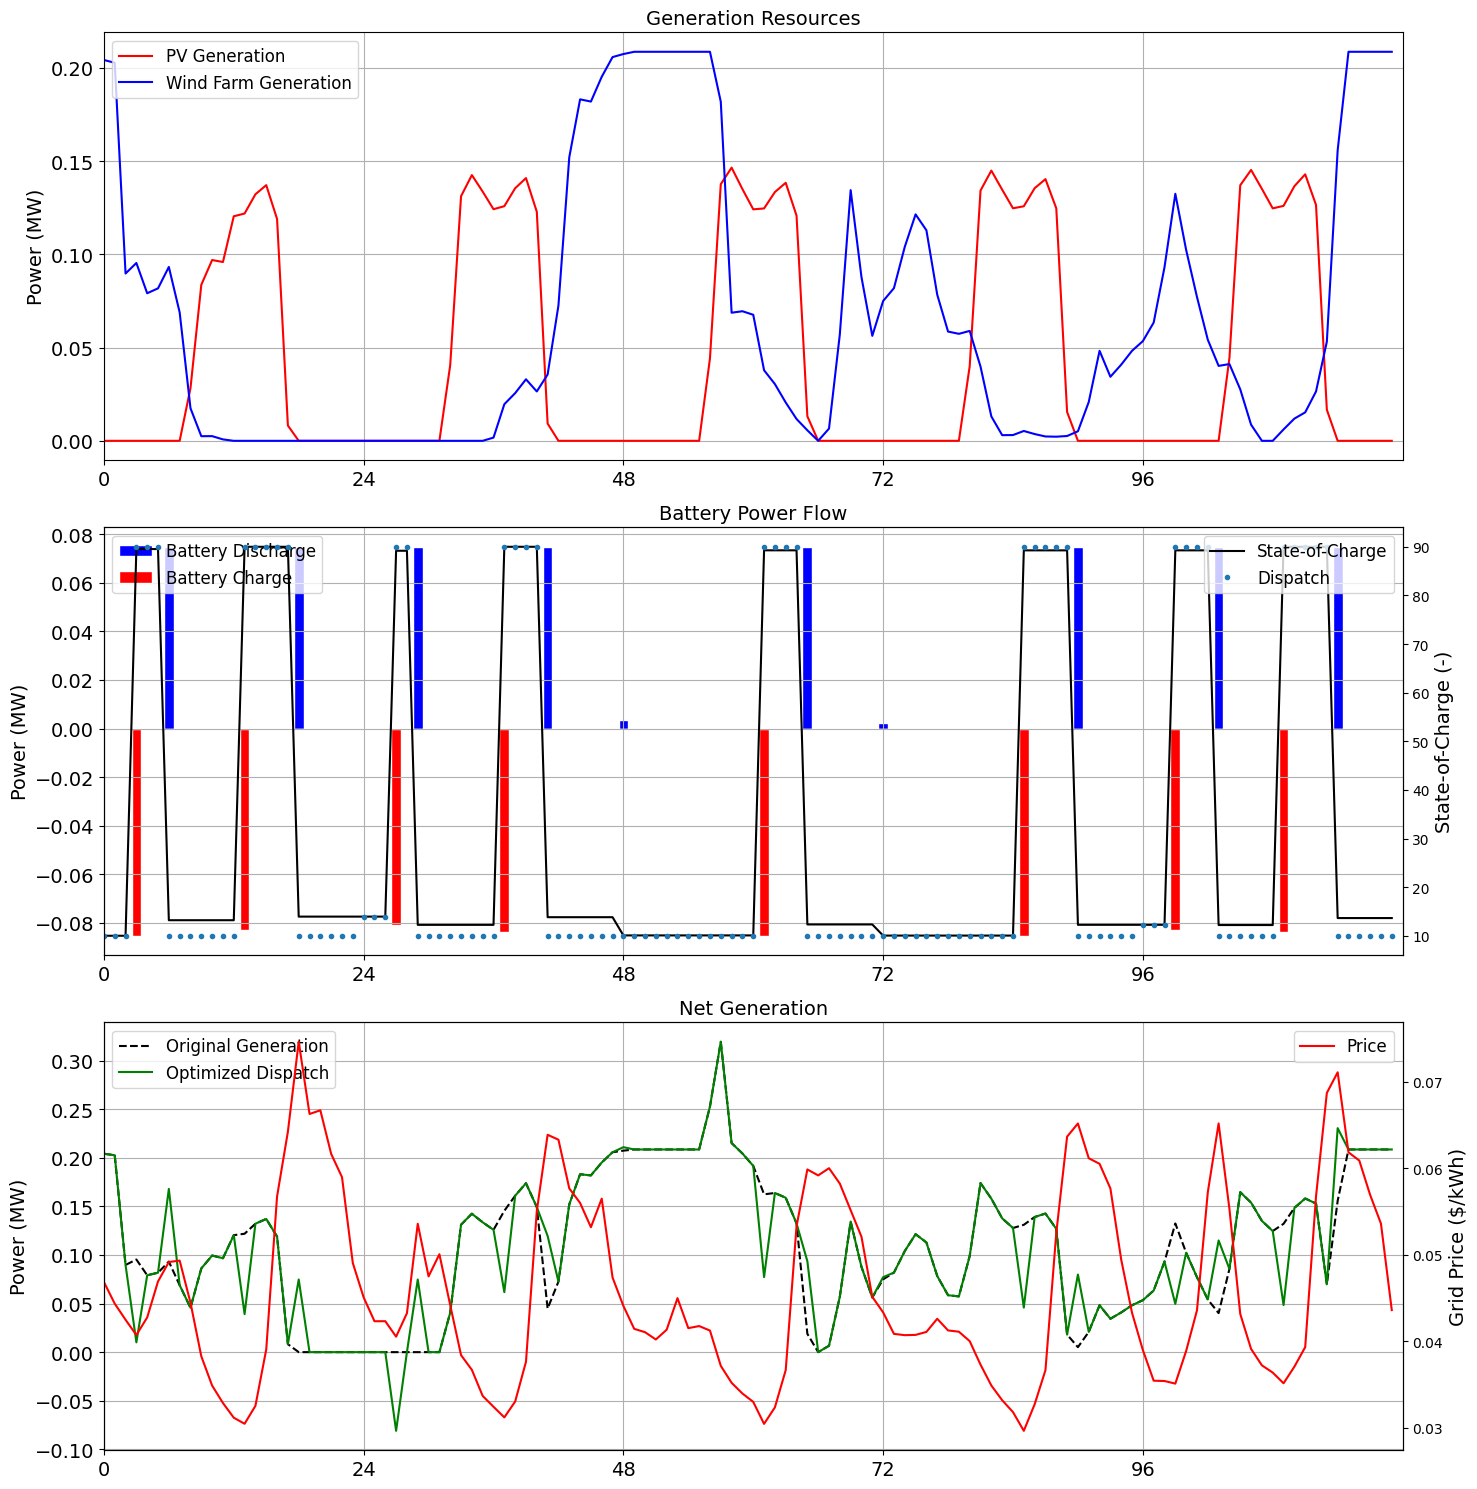

In [7]:
plot_generation_profile(hybrid_plant)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
ev = pd.read_csv("./data/ev_demand_22.csv", header=None)

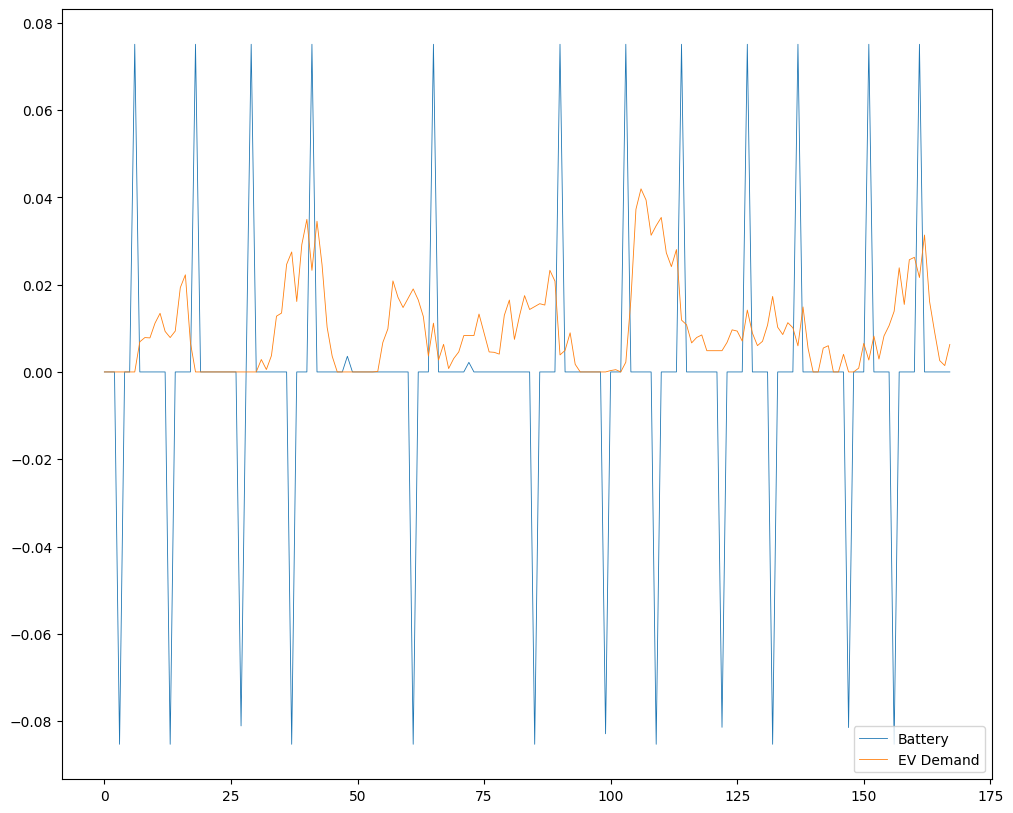

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))

x = np.arange(8760)
y = hybrid_plant.battery.outputs.dispatch_P

ax.plot(x[:24*7], y[:24*7], linewidth=.6, label="Battery")
ax.plot(x[:24*7], ev[:24*7], linewidth=.6, label="EV Demand")

ax.legend()